# 1.Linear regression

## 1.1 기존의 프로그램 방식 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [ ]:
# 섭씨온도 (input 데이터)를 받아, 화씨온도(target 데이터)로 출력

In [4]:
def celsius_to_faherenheit(x):
    return x * 1.8 + 32                 # 1.8x + 32   여기서     1.8이 kernel,   32가 bias

In [5]:
input_c = int(input('섭씨 온도는 ?'))
print("화씨온도는",celsius_to_faherenheit(input_c))

섭씨 온도는 ?10
화씨온도는 50.0


## 1.2 Machine Learning 프로그램 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리: 훈련 데이터셋, 검증 데이터셋, 시험 데이터 셋...
- 3. 모델 구성
- 4. 모델 학습과정 (예. 회귀선 출력 100번,1000번)
- 5. 모델 학습 시키기 
- 6. 모델 평가 (시험 데이터 셋으로)
- 7. 모델 사용 (입력값을 주어서 예측값을 받기)


In [6]:
#1 & 2. 데이터 
data_C = np.array(range(100))
data_C  # 입력값

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [7]:
data_F = celsius_to_faherenheit(data_C)
data_F  # target 값

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [8]:
from tensorflow.keras.models import Sequential # 모델 생성           #keras는 쉽게 쉽게 함수를 직관적으로 쓸 때 사용 
from tensorflow.keras.layers import Dense  # 입력값과 출력값 

In [9]:
#3. 모델 구성 
model = Sequential()
model.add(Dense(1,input_dim=1))  # target데이터: 1개   #input_dim=1: 독립변수 1개 

#4. 모델 학습과정 설정
model.compile(loss="mse",optimizer="rmsprop", metrics=['mae'])   #RMSProp: 보푹을 줄이기(이전 상황봐가면서)  크게크게 보폭줄이기
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
#학습전 예측
print(model.predict([0]))   #1도는    #학습을 하지 않아서 random값이 나옴 . 따라서 학습을하면 로스가 낮은 값으로 나옴 
                            #편향값이 0으로 랜덤으로 잡힘

[[0.]]


In [11]:
model.save("model/before_learning.h5")  #가중치, 편향이 random하게 잡힘    #HDFView실행   
                                                                            # y=2x+3   여기서 3이 bias

편차 줄이기 

In [12]:
# 2. 컴퓨터에게 학습시키기 위해 normalize함 (전체의 편차 줄이기. 이상적인 편차 0~1)
scaled_data_C = data_C/100.0    #원래 1 대신 0.01
scaled_data_F = data_F/100.0
print(scaled_data_C,end="\n\n")
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]

[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76

In [13]:
# 5. 모델 학습시키기 
hist = model.fit(scaled_data_C,scaled_data_F, epochs=1000, verbose=2)    #fit()함수  == 학습시키는 함수  
                                                             #epochs=1000   1000번 왔다갔다 해서 loss를 줄임
                                                    # verbose=1 한번 학습할때 loss,    verbose=0 이면 출력 안됨.
                                                    # verbose=2  loss가 더 줄어짐 (?)

Epoch 1/1000
4/4 - 0s - loss: 4.1975 - mae: 1.8448
Epoch 2/1000
4/4 - 0s - loss: 4.1545 - mae: 1.8342
Epoch 3/1000
4/4 - 0s - loss: 4.1218 - mae: 1.8262
Epoch 4/1000
4/4 - 0s - loss: 4.0929 - mae: 1.8188
Epoch 5/1000
4/4 - 0s - loss: 4.0658 - mae: 1.8120
Epoch 6/1000
4/4 - 0s - loss: 4.0400 - mae: 1.8055
Epoch 7/1000
4/4 - 0s - loss: 4.0155 - mae: 1.7992
Epoch 8/1000
4/4 - 0s - loss: 3.9902 - mae: 1.7928
Epoch 9/1000
4/4 - 0s - loss: 3.9672 - mae: 1.7870
Epoch 10/1000
4/4 - 0s - loss: 3.9449 - mae: 1.7812
Epoch 11/1000
4/4 - 0s - loss: 3.9221 - mae: 1.7753
Epoch 12/1000
4/4 - 0s - loss: 3.8993 - mae: 1.7695
Epoch 13/1000
4/4 - 0s - loss: 3.8756 - mae: 1.7633
Epoch 14/1000
4/4 - 0s - loss: 3.8557 - mae: 1.7582
Epoch 15/1000
4/4 - 0s - loss: 3.8327 - mae: 1.7523
Epoch 16/1000
4/4 - 0s - loss: 3.8098 - mae: 1.7462
Epoch 17/1000
4/4 - 0s - loss: 3.7865 - mae: 1.7401
Epoch 18/1000
4/4 - 0s - loss: 3.7648 - mae: 1.7344
Epoch 19/1000
4/4 - 0s - loss: 3.7451 - mae: 1.7293
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 1.3649 - mae: 0.9639
Epoch 159/1000
4/4 - 0s - loss: 1.3526 - mae: 0.9591
Epoch 160/1000
4/4 - 0s - loss: 1.3394 - mae: 0.9541
Epoch 161/1000
4/4 - 0s - loss: 1.3266 - mae: 0.9490
Epoch 162/1000
4/4 - 0s - loss: 1.3153 - mae: 0.9444
Epoch 163/1000
4/4 - 0s - loss: 1.3026 - mae: 0.9396
Epoch 164/1000
4/4 - 0s - loss: 1.2908 - mae: 0.9350
Epoch 165/1000
4/4 - 0s - loss: 1.2791 - mae: 0.9304
Epoch 166/1000
4/4 - 0s - loss: 1.2670 - mae: 0.9257
Epoch 167/1000
4/4 - 0s - loss: 1.2558 - mae: 0.9211
Epoch 168/1000
4/4 - 0s - loss: 1.2442 - mae: 0.9166
Epoch 169/1000
4/4 - 0s - loss: 1.2319 - mae: 0.9117
Epoch 170/1000
4/4 - 0s - loss: 1.2196 - mae: 0.9069
Epoch 171/1000
4/4 - 0s - loss: 1.2070 - mae: 0.9019
Epoch 172/1000
4/4 - 0s - loss: 1.1961 - mae: 0.8974
Epoch 173/1000
4/4 - 0s - loss: 1.1868 - mae: 0.8938
Epoch 174/1000
4/4 - 0s - loss: 1.1754 - mae: 0.8892
Epoch 175/1000
4/4 - 0s - loss: 1.1652 - mae: 0.8852
Epoch 176/1000
4/4 - 0s - loss: 1.1537 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.3093 - mae: 0.4792
Epoch 314/1000
4/4 - 0s - loss: 0.3081 - mae: 0.4785
Epoch 315/1000
4/4 - 0s - loss: 0.3058 - mae: 0.4769
Epoch 316/1000
4/4 - 0s - loss: 0.3043 - mae: 0.4758
Epoch 317/1000
4/4 - 0s - loss: 0.3031 - mae: 0.4751
Epoch 318/1000
4/4 - 0s - loss: 0.3018 - mae: 0.4742
Epoch 319/1000
4/4 - 0s - loss: 0.3004 - mae: 0.4730
Epoch 320/1000
4/4 - 0s - loss: 0.2986 - mae: 0.4717
Epoch 321/1000
4/4 - 0s - loss: 0.2972 - mae: 0.4707
Epoch 322/1000
4/4 - 0s - loss: 0.2951 - mae: 0.4692
Epoch 323/1000
4/4 - 0s - loss: 0.2936 - mae: 0.4682
Epoch 324/1000
4/4 - 0s - loss: 0.2915 - mae: 0.4668
Epoch 325/1000
4/4 - 0s - loss: 0.2907 - mae: 0.4661
Epoch 326/1000
4/4 - 0s - loss: 0.2896 - mae: 0.4652
Epoch 327/1000
4/4 - 0s - loss: 0.2883 - mae: 0.4643
Epoch 328/1000
4/4 - 0s - loss: 0.2869 - mae: 0.4632
Epoch 329/1000
4/4 - 0s - loss: 0.2857 - mae: 0.4622
Epoch 330/1000
4/4 - 0s - loss: 0.2841 - mae: 0.4609
Epoch 331/1000
4/4 - 0s - loss: 0.2825 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.1615 - mae: 0.3470
Epoch 469/1000
4/4 - 0s - loss: 0.1608 - mae: 0.3461
Epoch 470/1000
4/4 - 0s - loss: 0.1600 - mae: 0.3454
Epoch 471/1000
4/4 - 0s - loss: 0.1592 - mae: 0.3445
Epoch 472/1000
4/4 - 0s - loss: 0.1584 - mae: 0.3435
Epoch 473/1000
4/4 - 0s - loss: 0.1577 - mae: 0.3428
Epoch 474/1000
4/4 - 0s - loss: 0.1570 - mae: 0.3419
Epoch 475/1000
4/4 - 0s - loss: 0.1562 - mae: 0.3412
Epoch 476/1000
4/4 - 0s - loss: 0.1555 - mae: 0.3404
Epoch 477/1000
4/4 - 0s - loss: 0.1548 - mae: 0.3396
Epoch 478/1000
4/4 - 0s - loss: 0.1540 - mae: 0.3387
Epoch 479/1000
4/4 - 0s - loss: 0.1533 - mae: 0.3378
Epoch 480/1000
4/4 - 0s - loss: 0.1527 - mae: 0.3370
Epoch 481/1000
4/4 - 0s - loss: 0.1520 - mae: 0.3362
Epoch 482/1000
4/4 - 0s - loss: 0.1513 - mae: 0.3356
Epoch 483/1000
4/4 - 0s - loss: 0.1507 - mae: 0.3349
Epoch 484/1000
4/4 - 0s - loss: 0.1500 - mae: 0.3340
Epoch 485/1000
4/4 - 0s - loss: 0.1493 - mae: 0.3333
Epoch 486/1000
4/4 - 0s - loss: 0.1486 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0645 - mae: 0.2193
Epoch 624/1000
4/4 - 0s - loss: 0.0639 - mae: 0.2184
Epoch 625/1000
4/4 - 0s - loss: 0.0635 - mae: 0.2176
Epoch 626/1000
4/4 - 0s - loss: 0.0630 - mae: 0.2167
Epoch 627/1000
4/4 - 0s - loss: 0.0625 - mae: 0.2158
Epoch 628/1000
4/4 - 0s - loss: 0.0621 - mae: 0.2149
Epoch 629/1000
4/4 - 0s - loss: 0.0616 - mae: 0.2142
Epoch 630/1000
4/4 - 0s - loss: 0.0611 - mae: 0.2135
Epoch 631/1000
4/4 - 0s - loss: 0.0607 - mae: 0.2127
Epoch 632/1000
4/4 - 0s - loss: 0.0602 - mae: 0.2118
Epoch 633/1000
4/4 - 0s - loss: 0.0597 - mae: 0.2110
Epoch 634/1000
4/4 - 0s - loss: 0.0592 - mae: 0.2100
Epoch 635/1000
4/4 - 0s - loss: 0.0587 - mae: 0.2092
Epoch 636/1000
4/4 - 0s - loss: 0.0583 - mae: 0.2084
Epoch 637/1000
4/4 - 0s - loss: 0.0579 - mae: 0.2076
Epoch 638/1000
4/4 - 0s - loss: 0.0574 - mae: 0.2069
Epoch 639/1000
4/4 - 0s - loss: 0.0570 - mae: 0.2061
Epoch 640/1000
4/4 - 0s - loss: 0.0565 - mae: 0.2052
Epoch 641/1000
4/4 - 0s - loss: 0.0561 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0906
Epoch 779/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0899
Epoch 780/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0891
Epoch 781/1000
4/4 - 0s - loss: 0.0105 - mae: 0.0884
Epoch 782/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0876
Epoch 783/1000
4/4 - 0s - loss: 0.0102 - mae: 0.0867
Epoch 784/1000
4/4 - 0s - loss: 0.0099 - mae: 0.0859
Epoch 785/1000
4/4 - 0s - loss: 0.0097 - mae: 0.0850
Epoch 786/1000
4/4 - 0s - loss: 0.0096 - mae: 0.0844
Epoch 787/1000
4/4 - 0s - loss: 0.0094 - mae: 0.0835
Epoch 788/1000
4/4 - 0s - loss: 0.0092 - mae: 0.0826
Epoch 789/1000
4/4 - 0s - loss: 0.0089 - mae: 0.0816
Epoch 790/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0805
Epoch 791/1000
4/4 - 0s - loss: 0.0085 - mae: 0.0798
Epoch 792/1000
4/4 - 0s - loss: 0.0083 - mae: 0.0788
Epoch 793/1000
4/4 - 0s - loss: 0.0082 - mae: 0.0781
Epoch 794/1000
4/4 - 0s - loss: 0.0080 - mae: 0.0773
Epoch 795/1000
4/4 - 0s - loss: 0.0078 - mae: 0.0766
Epoch 796/1000
4/4 - 0s - loss: 0.0077 - mae: 

Epoch 926/1000
4/4 - 0s - loss: 5.0566e-07 - mae: 6.8938e-04
Epoch 927/1000
4/4 - 0s - loss: 6.4370e-07 - mae: 7.8559e-04
Epoch 928/1000
4/4 - 0s - loss: 1.3421e-06 - mae: 0.0011
Epoch 929/1000
4/4 - 0s - loss: 4.7791e-08 - mae: 2.1365e-04
Epoch 930/1000
4/4 - 0s - loss: 7.9716e-08 - mae: 2.6932e-04
Epoch 931/1000
4/4 - 0s - loss: 7.4388e-07 - mae: 8.1105e-04
Epoch 932/1000
4/4 - 0s - loss: 1.2749e-06 - mae: 0.0010
Epoch 933/1000
4/4 - 0s - loss: 1.4801e-07 - mae: 3.7699e-04
Epoch 934/1000
4/4 - 0s - loss: 1.9716e-07 - mae: 4.2772e-04
Epoch 935/1000
4/4 - 0s - loss: 1.2039e-06 - mae: 0.0011
Epoch 936/1000
4/4 - 0s - loss: 7.9604e-07 - mae: 8.4338e-04
Epoch 937/1000
4/4 - 0s - loss: 1.0051e-07 - mae: 3.0878e-04
Epoch 938/1000
4/4 - 0s - loss: 4.0918e-07 - mae: 6.1702e-04
Epoch 939/1000
4/4 - 0s - loss: 8.0579e-07 - mae: 8.8142e-04
Epoch 940/1000
4/4 - 0s - loss: 6.7702e-07 - mae: 8.0539e-04
Epoch 941/1000
4/4 - 0s - loss: 5.2550e-07 - mae: 7.1159e-04
Epoch 942/1000
4/4 - 0s - loss: 3.77

In [15]:
hist.history.keys()   #  hist.history 은  dictionary 형식으로 출력   

dict_keys(['loss', 'mae'])

- loss가 줄어 들임

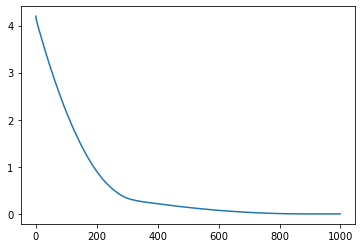

In [16]:
plt.plot(hist.history['loss'])
plt.show()

In [17]:
model.predict([0.01])   #np배열이 들어와야   # 1도  33.8 화씨온도

array([[0.33832166]], dtype=float32)

In [18]:
model.save('model/after_learning.h5')

scatter plot

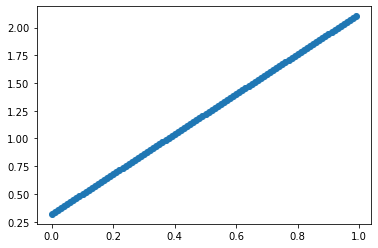

In [19]:
plt.scatter(x=scaled_data_C, y= scaled_data_F)

## 1.3 노이즈가 있는 데이터로 실습

In [ ]:
#노이즈가 0-1 사이에 왔다갔다 하게 

Noisy data are data with **a large amount of additional meaningless information** in it called **noise**

In [20]:
# 평균이 0 이고, 표준편차가 0.1인 데이터100개
np.random.seed(703)
noise = np.array(np.random.normal(0,0.1,100))
noise_scaled_data_F = scaled_data_F + noise

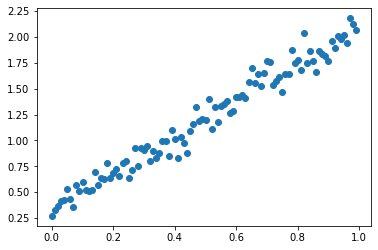

In [22]:
plt.scatter(x=scaled_data_C, y=noise_scaled_data_F)    #noise가 발생 
plt.show()

In [23]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1,input_dim=1))  #출력값은 1, 입력은 1개 들어옴 

# 4.학습과정 설정
model2.compile(loss="mse", optimizer="rmsprop")  #여기서 철자틀리면 에러 여기서 안나고 , 학습할 때 error남
print(model2.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
print(model2.predict(np.array([0.01])))

[[0.00635674]]


In [26]:
# 5. 모델 학습시키기
hist2 = model2.fit(scaled_data_C,noise_scaled_data_F,epochs=1000, verbose=2) # 독립변수, 종속변수    1000번 학습  데이터가 0에서2사이 왔다 갔다

Epoch 1/1000
4/4 - 0s - loss: 0.9011
Epoch 2/1000
4/4 - 0s - loss: 0.8796
Epoch 3/1000
4/4 - 0s - loss: 0.8643
Epoch 4/1000
4/4 - 0s - loss: 0.8520
Epoch 5/1000
4/4 - 0s - loss: 0.8391
Epoch 6/1000
4/4 - 0s - loss: 0.8282
Epoch 7/1000
4/4 - 0s - loss: 0.8167
Epoch 8/1000
4/4 - 0s - loss: 0.8062
Epoch 9/1000
4/4 - 0s - loss: 0.7953
Epoch 10/1000
4/4 - 0s - loss: 0.7848
Epoch 11/1000
4/4 - 0s - loss: 0.7744
Epoch 12/1000
4/4 - 0s - loss: 0.7647
Epoch 13/1000
4/4 - 0s - loss: 0.7548
Epoch 14/1000
4/4 - 0s - loss: 0.7452
Epoch 15/1000
4/4 - 0s - loss: 0.7351
Epoch 16/1000
4/4 - 0s - loss: 0.7248
Epoch 17/1000
4/4 - 0s - loss: 0.7151
Epoch 18/1000
4/4 - 0s - loss: 0.7045
Epoch 19/1000
4/4 - 0s - loss: 0.6943
Epoch 20/1000
4/4 - 0s - loss: 0.6852
Epoch 21/1000
4/4 - 0s - loss: 0.6753
Epoch 22/1000
4/4 - 0s - loss: 0.6661
Epoch 23/1000
4/4 - 0s - loss: 0.6565
Epoch 24/1000
4/4 - 0s - loss: 0.6475
Epoch 25/1000
4/4 - 0s - loss: 0.6377
Epoch 26/1000
4/4 - 0s - loss: 0.6288
Epoch 27/1000
4/4 - 0

Epoch 214/1000
4/4 - 0s - loss: 0.0198
Epoch 215/1000
4/4 - 0s - loss: 0.0196
Epoch 216/1000
4/4 - 0s - loss: 0.0194
Epoch 217/1000
4/4 - 0s - loss: 0.0192
Epoch 218/1000
4/4 - 0s - loss: 0.0190
Epoch 219/1000
4/4 - 0s - loss: 0.0188
Epoch 220/1000
4/4 - 0s - loss: 0.0186
Epoch 221/1000
4/4 - 0s - loss: 0.0185
Epoch 222/1000
4/4 - 0s - loss: 0.0183
Epoch 223/1000
4/4 - 0s - loss: 0.0181
Epoch 224/1000
4/4 - 0s - loss: 0.0180
Epoch 225/1000
4/4 - 0s - loss: 0.0178
Epoch 226/1000
4/4 - 0s - loss: 0.0176
Epoch 227/1000
4/4 - 0s - loss: 0.0175
Epoch 228/1000
4/4 - 0s - loss: 0.0173
Epoch 229/1000
4/4 - 0s - loss: 0.0172
Epoch 230/1000
4/4 - 0s - loss: 0.0170
Epoch 231/1000
4/4 - 0s - loss: 0.0169
Epoch 232/1000
4/4 - 0s - loss: 0.0167
Epoch 233/1000
4/4 - 0s - loss: 0.0166
Epoch 234/1000
4/4 - 0s - loss: 0.0164
Epoch 235/1000
4/4 - 0s - loss: 0.0162
Epoch 236/1000
4/4 - 0s - loss: 0.0161
Epoch 237/1000
4/4 - 0s - loss: 0.0160
Epoch 238/1000
4/4 - 0s - loss: 0.0158
Epoch 239/1000
4/4 - 0s -

Epoch 425/1000
4/4 - 0s - loss: 0.0086
Epoch 426/1000
4/4 - 0s - loss: 0.0086
Epoch 427/1000
4/4 - 0s - loss: 0.0086
Epoch 428/1000
4/4 - 0s - loss: 0.0086
Epoch 429/1000
4/4 - 0s - loss: 0.0086
Epoch 430/1000
4/4 - 0s - loss: 0.0086
Epoch 431/1000
4/4 - 0s - loss: 0.0086
Epoch 432/1000
4/4 - 0s - loss: 0.0086
Epoch 433/1000
4/4 - 0s - loss: 0.0086
Epoch 434/1000
4/4 - 0s - loss: 0.0086
Epoch 435/1000
4/4 - 0s - loss: 0.0086
Epoch 436/1000
4/4 - 0s - loss: 0.0086
Epoch 437/1000
4/4 - 0s - loss: 0.0086
Epoch 438/1000
4/4 - 0s - loss: 0.0086
Epoch 439/1000
4/4 - 0s - loss: 0.0086
Epoch 440/1000
4/4 - 0s - loss: 0.0086
Epoch 441/1000
4/4 - 0s - loss: 0.0086
Epoch 442/1000
4/4 - 0s - loss: 0.0086
Epoch 443/1000
4/4 - 0s - loss: 0.0086
Epoch 444/1000
4/4 - 0s - loss: 0.0086
Epoch 445/1000
4/4 - 0s - loss: 0.0086
Epoch 446/1000
4/4 - 0s - loss: 0.0086
Epoch 447/1000
4/4 - 0s - loss: 0.0086
Epoch 448/1000
4/4 - 0s - loss: 0.0086
Epoch 449/1000
4/4 - 0s - loss: 0.0086
Epoch 450/1000
4/4 - 0s -

Epoch 636/1000
4/4 - 0s - loss: 0.0086
Epoch 637/1000
4/4 - 0s - loss: 0.0086
Epoch 638/1000
4/4 - 0s - loss: 0.0086
Epoch 639/1000
4/4 - 0s - loss: 0.0086
Epoch 640/1000
4/4 - 0s - loss: 0.0086
Epoch 641/1000
4/4 - 0s - loss: 0.0086
Epoch 642/1000
4/4 - 0s - loss: 0.0086
Epoch 643/1000
4/4 - 0s - loss: 0.0086
Epoch 644/1000
4/4 - 0s - loss: 0.0086
Epoch 645/1000
4/4 - 0s - loss: 0.0086
Epoch 646/1000
4/4 - 0s - loss: 0.0086
Epoch 647/1000
4/4 - 0s - loss: 0.0086
Epoch 648/1000
4/4 - 0s - loss: 0.0086
Epoch 649/1000
4/4 - 0s - loss: 0.0086
Epoch 650/1000
4/4 - 0s - loss: 0.0086
Epoch 651/1000
4/4 - 0s - loss: 0.0086
Epoch 652/1000
4/4 - 0s - loss: 0.0086
Epoch 653/1000
4/4 - 0s - loss: 0.0086
Epoch 654/1000
4/4 - 0s - loss: 0.0086
Epoch 655/1000
4/4 - 0s - loss: 0.0086
Epoch 656/1000
4/4 - 0s - loss: 0.0087
Epoch 657/1000
4/4 - 0s - loss: 0.0086
Epoch 658/1000
4/4 - 0s - loss: 0.0086
Epoch 659/1000
4/4 - 0s - loss: 0.0086
Epoch 660/1000
4/4 - 0s - loss: 0.0086
Epoch 661/1000
4/4 - 0s -

Epoch 847/1000
4/4 - 0s - loss: 0.0086
Epoch 848/1000
4/4 - 0s - loss: 0.0086
Epoch 849/1000
4/4 - 0s - loss: 0.0086
Epoch 850/1000
4/4 - 0s - loss: 0.0086
Epoch 851/1000
4/4 - 0s - loss: 0.0086
Epoch 852/1000
4/4 - 0s - loss: 0.0086
Epoch 853/1000
4/4 - 0s - loss: 0.0086
Epoch 854/1000
4/4 - 0s - loss: 0.0086
Epoch 855/1000
4/4 - 0s - loss: 0.0086
Epoch 856/1000
4/4 - 0s - loss: 0.0086
Epoch 857/1000
4/4 - 0s - loss: 0.0086
Epoch 858/1000
4/4 - 0s - loss: 0.0086
Epoch 859/1000
4/4 - 0s - loss: 0.0086
Epoch 860/1000
4/4 - 0s - loss: 0.0086
Epoch 861/1000
4/4 - 0s - loss: 0.0086
Epoch 862/1000
4/4 - 0s - loss: 0.0086
Epoch 863/1000
4/4 - 0s - loss: 0.0086
Epoch 864/1000
4/4 - 0s - loss: 0.0086
Epoch 865/1000
4/4 - 0s - loss: 0.0086
Epoch 866/1000
4/4 - 0s - loss: 0.0086
Epoch 867/1000
4/4 - 0s - loss: 0.0086
Epoch 868/1000
4/4 - 0s - loss: 0.0086
Epoch 869/1000
4/4 - 0s - loss: 0.0086
Epoch 870/1000
4/4 - 0s - loss: 0.0086
Epoch 871/1000
4/4 - 0s - loss: 0.0086
Epoch 872/1000
4/4 - 0s -

noise가 있어서 근접하게 안나옴 

In [27]:
print(model2.predict(np.array([0.01])))

[[0.35661045]]


In [ ]:
plt.plot(hist.history['loss'])
plt.show()

In [28]:
model2.save('model/noise_after_learning.h5')